In [10]:
import nltk
from konlpy.corpus import kobill
from konlpy.tag import Twitter; t = Twitter()
import matplotlib.pyplot as plt

files_ko = kobill.fileids()
doc_ko = kobill.open('1809890.txt').read()
#doc_ko
tokens_ko = t.nouns(doc_ko) # 명사 기준으로 단어 수집
len(tokens_ko) # 수집된 단어의 횟수 확인
len(set(tokens_ko)) # 수집된 단어의 고유한 횟수 확인 (중복없이)

ko = nltk.Text(tokens_ko, name = '대한민국 국회 의안 제 1809890호')
len(ko.tokens) # 수집된 단어의 횟수 확인
len(set(ko.tokens)) # 수집된 단어의 고유한 횟수 확인 (중복없이)
ko.vocab() #단어가 각각 몇회 발생했는지 dictionary 타입으로 반환함.

FreqDist({'육아휴직': 38, '발생': 19, '만': 18, '이하': 18, '비용': 17, '액': 17, '경우': 16, '세': 16, '자녀': 14, '고용': 14, ...})

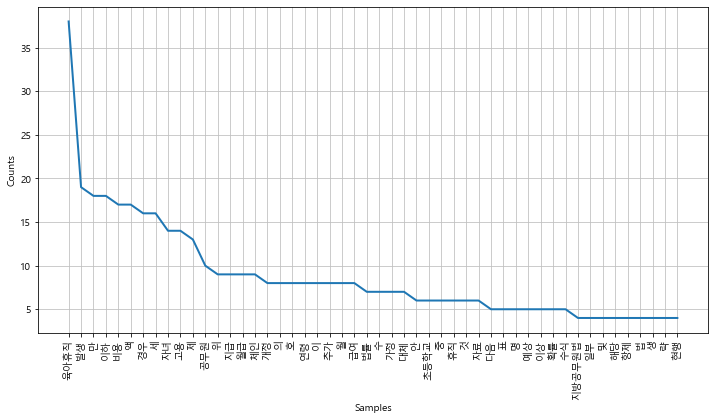

In [12]:
######################한글문제해결#########################
%matplotlib inline

import platform
path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font',family='AppleGothic')
elif platform.system() == 'Windows':
    font_name =font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unkown Sytem....Sorry')
#########################################################

plt.figure( figsize = (12,6) )
ko.plot(50)
plt.show()

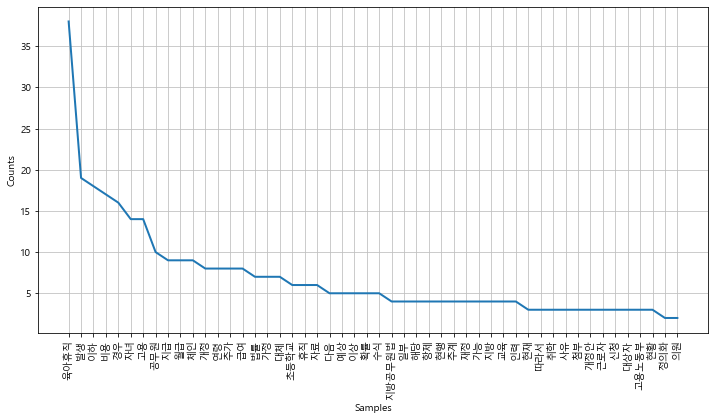

<function matplotlib.pyplot.show(*args, **kw)>

In [21]:
#stop_words = [',','(',')',',',"'",'%','-','X',').','x']
#ko = [each_word for each_word in ko if each_word not in stop_words]
ko = [each_word for each_word in ko if len(each_word) > 1 ]

plt.figure(figsize=(12,6))
ko = nltk.Text(ko, name = '대한민국 국회 의안 제 1809890호')
# 이거 없이 ko.plot하면 [AttributeError: 'list' object has no attribute 'plot'] error가 남.
ko.plot(50) # plot을 쓰기 위해서 ko를 nltk.Text()로 만들어주어야 한다.
plt.show

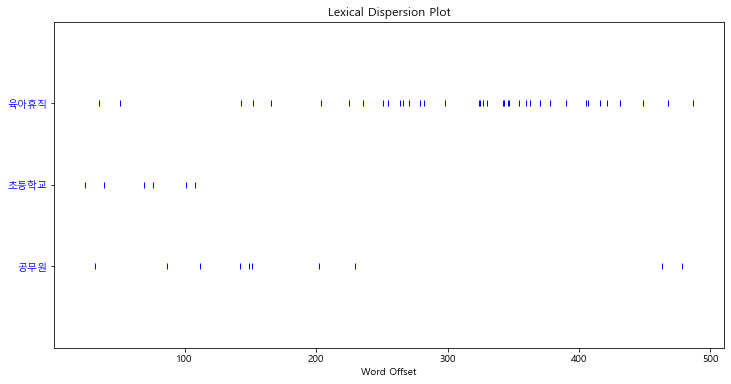

In [23]:
plt.figure(figsize=(12,6))
ko.dispersion_plot(['육아휴직','초등학교','공무원']) #원하는 단어의 빈도/문서내 위치를 개략적으로 알 수 있다.

In [24]:
ko.concordance('초등학교') # 원하는 단어의 주변부 단어까지 같이 확인

Displaying 6 of 6 matches:
 여상규 안규백 황영철 박영아 김정훈 김학송 의원 제안 이유 내용 초등학교 저학년 경우 부모 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직
 사랑 필요 나이 현재 공무원 자녀 양육 육아휴직 자녀 나이 이하 초등학교 저학년 자녀 해당 부모님 일자리 출산 의욕 저하 문제 것임 따라서
방공무원법 일부 개정 법률 지방공무원법 일부 다음 개정 항제 이하 초등학교 취학 자녀 이하 취학 중인 경우 초등학교 학년 이하 자녀 공포 시
부 다음 개정 항제 이하 초등학교 취학 자녀 이하 취학 중인 경우 초등학교 학년 이하 자녀 공포 시행 구조 문대비 휴직 휴직 현행 공무원 다
의 하나 해당 사유 임용 휴직 다만 경우 대통령령 사정 현행 이하 초등학교 이하 취학 중인 경우 자녀 양육 초등학교 학년 이하 여자 공무원 
대통령령 사정 현행 이하 초등학교 이하 취학 중인 경우 자녀 양육 초등학교 학년 이하 여자 공무원 자녀 임신 출산 현행 현행 지방공무원법 일


In [25]:
ko.collocations() # 문서 내에서 어떤 단어들이 연어(collocation)로 사용되었는지 확인

초등학교 저학년; 공무원 근로자; 근로자 육아휴직; 대상자 육아휴직; 육아휴직 대상자; 공무원 육아휴직; 육아휴직 육아휴직


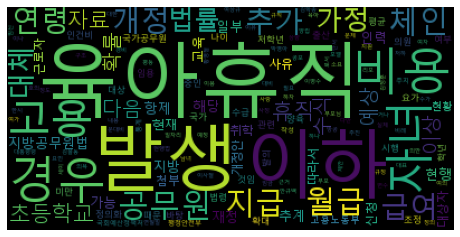

In [47]:
data = ko.vocab().most_common(150) # 발생빈도 많은 150개단어 저장

from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(font_path = "c:/Windows/Fonts/malgun.ttf",
                        relative_scaling = 0.2,
                        #background_color = 'white',
                        ).generate_from_frequencies(dict(data))

plt.figure(figsize=(8,40)) # 틀 만들어줌
plt.imshow(wordcloud) # 워드클라우드 표현
plt.axis("off") # 가로세로 축 없애줌
plt.show()